<a href="https://colab.research.google.com/github/yashika51/EluciData/blob/master/EluciData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Reading data

!pip install cmapPy
import cmapPy
import pkg_resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cmapPy.pandasGEXpress.parse import parse
file_path="/content/drive/My Drive/data_analyst_intern/PAAD.gct"
gctoo=parse(file_path, convert_neg_666=True, rid=None, cid=None, ridx=None, cidx=None, row_meta_only=False, col_meta_only=False, make_multiindex=False)
import warnings
warnings.filterwarnings('ignore')

# Getting the dataframe out of gctoo instance
 
 The rows are genes and the columns are samples

In [21]:
#getting the dataframe out of gctoo instance 

gctoo.data_df.shape
gctoo.col_metadata_df.columns.unique()
len(gctoo.row_metadata_df),len(gctoo.col_metadata_df)

(18465, 183)

In [0]:
df=gctoo.data_df

In [23]:
df.tail()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZYG11B,9.2,9.3,9.4,9.4,9.3,9.9,9.1,9.5,8.9,8.3,9.5,9.2,9.6,9.7,10.1,9.5,8.5,8.7,9.4,9.4,9.0,8.7,9.4,8.6,9.4,9.2,9.5,9.2,9.0,10.2,9.2,9.3,9.3,9.2,9.9,9.3,10.0,9.9,9.3,9.0,...,9.6,9.4,9.2,9.6,9.5,9.3,10.0,9.7,9.5,9.8,8.4,9.3,9.2,8.2,8.9,9.3,9.0,9.3,9.6,9.3,8.9,8.9,9.6,9.6,8.7,8.8,9.5,9.1,9.2,9.7,9.7,9.2,9.5,9.5,9.4,9.4,9.6,9.2,8.3,9.5
ZYX,12.9,12.4,13.5,12.5,13.0,12.2,12.9,12.6,12.7,12.5,12.0,12.8,13.7,12.5,13.6,12.8,12.3,12.8,12.6,11.8,12.5,12.7,10.9,12.4,13.0,12.8,12.6,13.2,12.6,10.5,11.5,12.0,9.2,9.4,9.7,12.9,10.8,12.4,12.2,13.1,...,12.6,12.9,12.8,13.0,12.5,13.1,13.4,12.0,11.4,12.4,12.7,12.3,13.5,13.0,12.8,12.8,12.8,13.3,11.9,12.4,12.5,12.5,12.3,12.8,11.8,12.7,12.9,12.2,12.8,12.9,12.4,12.6,13.5,12.5,12.7,13.6,13.1,13.2,12.3,12.3
ZZEF1,10.1,9.8,9.8,9.7,10.1,10.4,9.7,10.6,10.0,9.9,9.8,9.6,10.6,10.4,11.0,9.5,9.8,9.4,10.0,9.8,9.7,9.2,11.1,9.9,11.4,10.2,9.8,9.7,9.9,9.7,11.9,11.1,11.6,11.0,11.8,9.6,11.5,10.6,9.4,10.2,...,10.9,9.8,11.1,10.4,10.4,9.5,10.5,10.7,9.7,10.0,9.9,10.1,9.9,9.3,9.6,10.6,10.4,10.1,10.2,9.7,10.0,9.7,10.7,10.5,10.6,10.0,9.9,10.0,10.4,10.1,10.6,9.9,9.8,10.3,10.4,10.2,9.9,9.8,9.6,10.9
ZZZ3,9.3,8.9,9.2,9.3,9.2,9.6,8.9,9.8,8.8,8.6,9.5,9.2,9.3,9.3,9.2,9.4,8.1,8.5,9.3,9.1,8.8,8.3,8.9,8.2,9.3,9.1,9.3,8.6,9.2,8.7,9.4,8.9,10.0,10.0,10.1,9.3,9.6,9.7,9.2,9.1,...,9.5,9.2,9.0,8.9,9.2,8.9,9.5,9.4,9.6,9.6,8.1,9.2,8.7,7.6,8.8,9.1,9.0,9.3,9.3,9.0,8.8,8.7,9.2,9.4,9.5,9.1,9.0,9.2,8.6,9.3,9.6,9.0,9.0,9.5,9.2,8.5,8.8,8.6,8.4,9.4
psiTPTE22,5.5,4.5,4.7,6.4,4.9,5.0,5.6,5.1,4.6,3.6,5.3,5.0,4.8,5.7,6.5,4.8,6.7,4.1,3.9,4.8,4.3,5.4,4.2,4.4,6.0,5.6,7.4,6.4,4.3,7.8,3.5,4.1,3.6,2.4,2.4,4.2,2.5,5.8,3.9,5.8,...,4.9,4.8,5.4,6.0,6.3,5.3,6.6,6.2,3.8,4.7,5.2,5.0,5.2,4.4,5.1,5.6,3.8,4.5,4.3,5.4,2.2,4.3,4.4,4.3,6.7,3.9,5.1,2.5,5.8,7.0,6.0,4.9,5.3,5.6,6.1,7.2,5.1,5.9,2.4,5.4


In [24]:
#Since most of the samples are Primary Solid Tumor we can rename it to PST for ease during plotting annotations
'''
col=df.columns
col=col.str.replace('-Primary solid Tumor','PST')
df.columns=col
df.columns.nunique()
'''

"\ncol=df.columns\ncol=col.str.replace('-Primary solid Tumor','PST')\ndf.columns=col\ndf.columns.nunique()\n"

# Counting Number of Null Values for each column

In [25]:
#Number of genes with Null Values
df.isna().sum(axis=0)
# df.isna().sum(axis=1)

cid
aab1-Primary solid Tumor     645
aab4-Primary solid Tumor     532
aab6-Primary solid Tumor     983
aab8-Primary solid Tumor    1014
aab9-Primary solid Tumor     961
                            ... 
a89d-Solid Tissue Normal     581
a89d-Primary solid Tumor     593
a8sy-Primary solid Tumor     829
a8lh-Primary solid Tumor     699
aapl-Primary solid Tumor     934
Length: 183, dtype: int64

# Dropping the null values

In [26]:
#Dropping null values
df.dropna(axis=0,inplace=True)
df.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,aabk-Primary solid Tumor,aabo-Primary solid Tumor,aabp-Primary solid Tumor,aabr-Primary solid Tumor,aabt-Primary solid Tumor,aabu-Primary solid Tumor,aabv-Primary solid Tumor,aaqa-Primary solid Tumor,aaqe-Primary solid Tumor,aaqi-Primary solid Tumor,aaqj-Primary solid Tumor,aaql-Primary solid Tumor,aaqm-Primary solid Tumor,a9i5-Primary solid Tumor,a9i7-Primary solid Tumor,a9i9-Primary solid Tumor,a9ib-Primary solid Tumor,a9ic-Primary solid Tumor,a9ih-Primary solid Tumor,a9ij-Primary solid Tumor,a9il-Primary solid Tumor,a9in-Primary solid Tumor,a9io-Primary solid Tumor,a9ir-Primary solid Tumor,a9is-Primary solid Tumor,a9iu-Primary solid Tumor,a9iv-Primary solid Tumor,a9ix-Primary solid Tumor,a9iz-Primary solid Tumor,a9j0-Primary solid Tumor,...,aaup-Primary solid Tumor,aauq-Primary solid Tumor,aaur-Primary solid Tumor,aaus-Primary solid Tumor,aaut-Primary solid Tumor,aauu-Primary solid Tumor,aauv-Primary solid Tumor,aauw-Primary solid Tumor,a7w4-Primary solid Tumor,a7sx-Primary solid Tumor,a8f3-Primary solid Tumor,a9q5-Primary solid Tumor,a5n4-Primary solid Tumor,a75w-Primary solid Tumor,a5re-Primary solid Tumor,a5qy-Primary solid Tumor,aa2a-Primary solid Tumor,a7b8-Primary solid Tumor,aa9m-Primary solid Tumor,aaas-Primary solid Tumor,a8rm-Primary solid Tumor,a8ro-Primary solid Tumor,a8rp-Primary solid Tumor,a774-Primary solid Tumor,a776-Primary solid Tumor,a779-Primary solid Tumor,a77e-Primary solid Tumor,a77g-Primary solid Tumor,a77j-Primary solid Tumor,aaug-Primary solid Tumor,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,7.5,7.55,7.8,8.15,8.7,8.0,6.5,6.55,8.1,7.3,7.95,7.3,8.35,6.4,8.25,8.55,7.5,7.65,7.45,8.1,8.7,8.0,7.5,9.95,8.7,8.05,7.65,7.65,7.85,8.05,...,8.8,8.25,9.0,8.05,8.5,7.7,8.2,8.8,8.4,8.65,7.45,7.7,7.85,7.7,7.4,8.5,7.15,8.15,8.0,7.8,7.6,6.4,8.55,8.5,7.45,7.5,8.4,8.45,7.95,8.2,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,6.8,5.90,5.7,6.70,5.4,5.8,6.7,6.00,7.0,5.7,6.50,7.8,10.00,7.3,6.10,7.20,6.5,7.10,6.50,9.3,9.5,9.7,8.6,8.00,8.5,6.20,9.00,6.70,5.30,5.10,...,6.8,7.20,7.5,7.80,7.4,5.9,7.7,6.3,7.1,6.00,6.30,6.7,5.20,8.1,7.2,8.1,6.20,7.40,6.6,7.6,5.3,6.3,6.90,6.9,4.70,6.5,6.7,5.20,8.00,7.6,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,7.1,7.70,6.4,6.50,6.9,6.0,8.2,8.40,6.4,7.1,6.40,8.1,6.60,7.7,7.10,7.50,6.0,6.50,7.30,6.3,6.7,5.5,6.4,5.50,3.8,6.60,4.40,7.00,6.80,6.80,...,6.6,6.80,6.8,6.70,6.7,6.2,6.8,7.2,5.3,7.30,8.20,7.7,6.60,8.0,7.5,6.9,6.40,7.00,6.7,7.3,7.5,6.8,7.00,7.1,6.70,7.4,7.1,7.40,6.80,6.1,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,13.5,14.60,14.7,14.40,14.7,13.3,13.5,12.50,12.9,13.5,13.90,14.4,14.50,13.0,13.80,13.80,14.6,13.60,13.70,12.8,13.9,14.1,12.6,12.00,11.6,13.30,12.80,14.40,12.70,13.50,...,14.3,14.20,14.6,14.50,14.9,13.4,14.7,14.4,13.0,12.40,14.30,14.3,13.90,13.4,13.3,14.1,13.10,14.10,14.1,15.1,13.2,13.6,14.30,14.0,11.50,13.2,13.9,12.70,14.50,14.8,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,7.8,8.70,10.3,10.50,9.5,10.5,9.0,8.60,8.6,8.7,10.10,9.3,9.10,9.4,9.50,8.10,10.1,9.90,9.70,8.9,8.1,9.7,7.0,9.70,7.1,10.50,6.60,8.40,10.00,8.60,...,9.0,9.50,9.7,9.80,9.5,9.2,9.5,8.9,9.8,10.10,10.20,8.6,9.50,10.1,9.6,9.3,9.80,8.30,8.2,9.3,7.0,9.6,8.50,9.2,9.20,7.2,10.0,7.80,9.50,8.9,9.10,9.50,10.0,9.50,9.1,10.

# Plotting Data

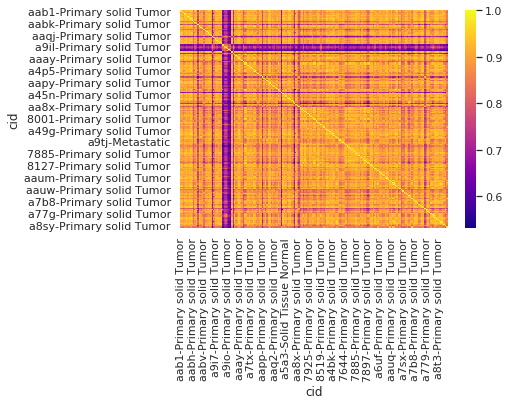

In [27]:
#plotting heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


sns.heatmap(gctoo.data_df.corr(), cmap='plasma')
plt.show()

# Separating the samples by creating three dataframes
1. df_normal: Containing Solid Tissue Normal Samples

2. df_meta: Containing Metastatic Samples

3. df_PST: Containing Primary Solid Tumor

In [28]:
#separating the datafreames into Nomral,Metastatic and Solid Tumor

normal=df.columns.str.endswith('Normal')
meta=df.columns.str.endswith('Metastatic')
m=np.argwhere(meta==True)
i=np.argwhere(normal==True)
df_normal=df.columns[normal]
df_meta=df.columns[meta]
df_meta=df[df_meta]
df_normal=df[df_normal]
df_PST=df.drop(df.columns[i],axis=1).drop(df.columns[m],axis=1)
df_normal.head()

cid,8124-Solid Tissue Normal,a45n-Solid Tissue Normal,a5a3-Solid Tissue Normal,a89d-Solid Tissue Normal
rid,,,,
SLC35E2,8.45,9.0,8.05,7.25
A1BG,6.40,7.2,6.90,7.10
A2LD1,6.90,6.8,7.00,6.70
A2M,15.00,13.6,14.90,14.90
A4GALT,9.10,8.7,9.40,10.50


# Trying out Isomap for dimesnionality Reduction and plotting 

In [29]:
from sklearn.manifold import Isomap # isomap is a dimensionality reduction algorithm 
from sklearn.preprocessing import normalize


data = df.to_numpy() # convert dataframe to numpy array
data=normalize(data) # normalize data

reducer= Isomap(n_components=2)
data=reducer.fit_transform(data.T) # reduce dimension with isomap
data.shape


(183, 2)

In [0]:
import seaborn as sns
import sklearn.cluster as cluster
import time
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.75, 's' : 1000, 'linewidths':0}

# Plotting Complete Data

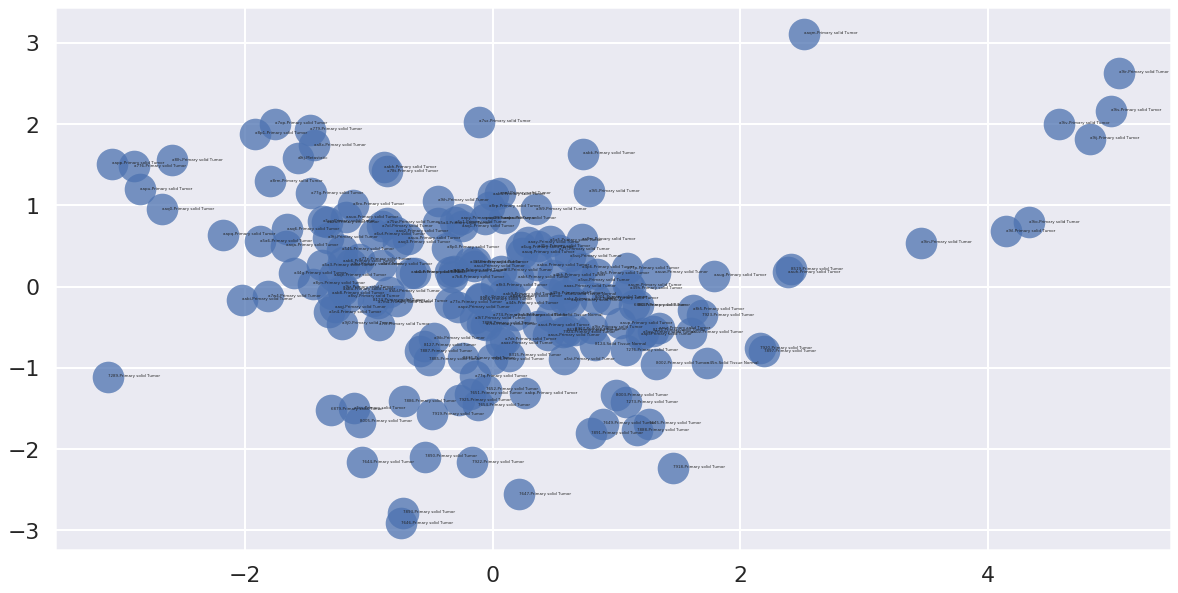

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data.T[0], data.T[1], c='b', **plot_kwds)

for i,col in enumerate(df.columns):
  ax.annotate(col,(data.T[0,i], data.T[1,i]),fontsize=4)
plt.show()

# Plotting Clusters

In [0]:
def plot_clusters(data, algorithm, col, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    fig, ax = plt.subplots(figsize=(20,10))

    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    ax.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=8)
    for i,col in enumerate(df.columns):
      ax.annotate(col,(data.T[0,i], data.T[1,i]),fontsize=14)
    


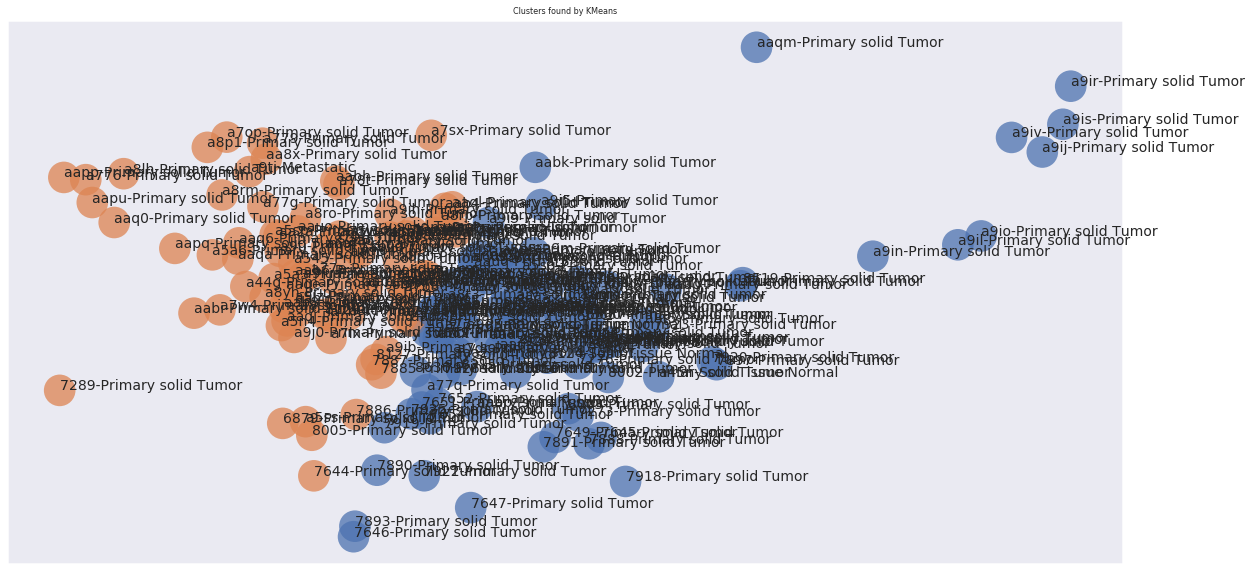

In [33]:
import numpy as np
plot_clusters(data, cluster.KMeans, df.columns, (), {'n_clusters':2})

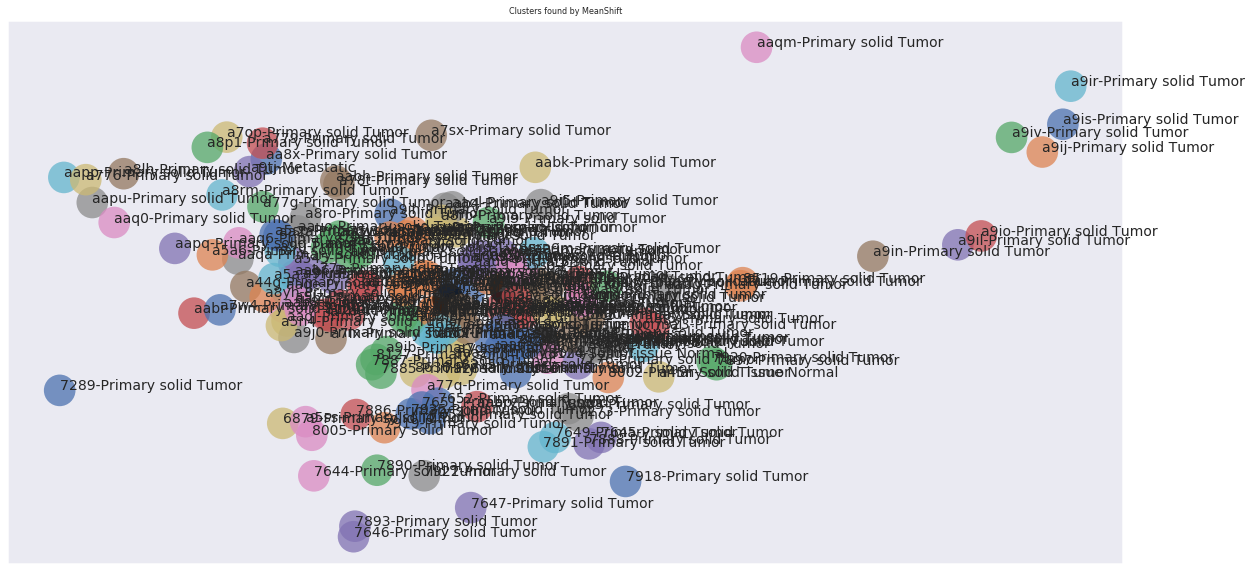

In [34]:
plot_clusters(data, cluster.MeanShift, df.columns, (0.175,), {'cluster_all':False})


# Plotting df_PST

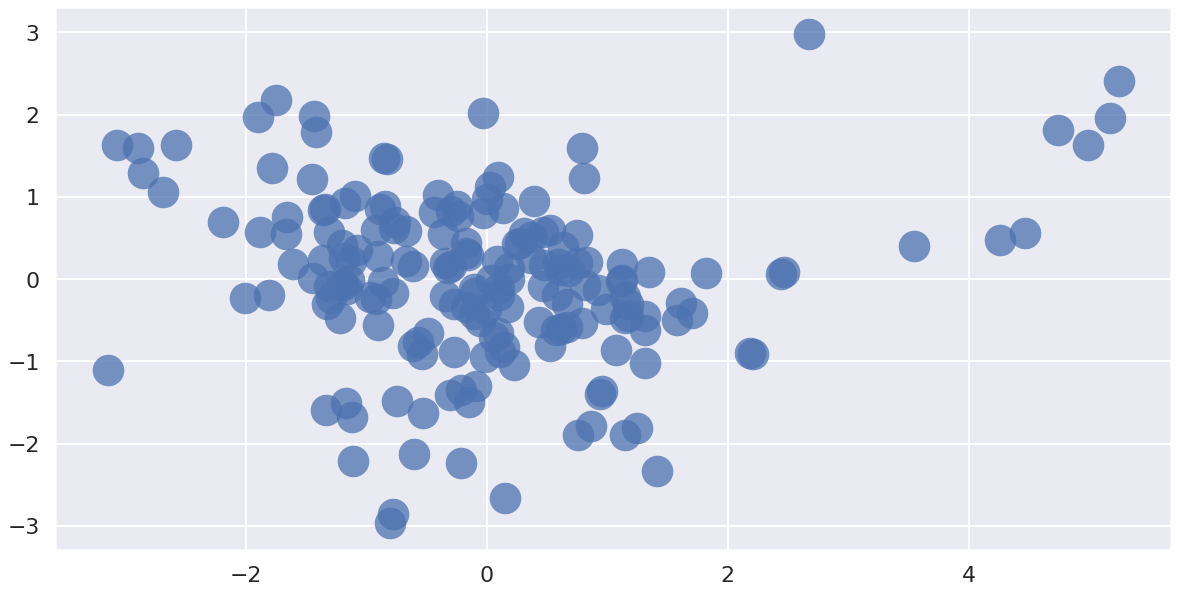

In [35]:
data = df_PST.to_numpy() # convert dataframe to numpy array
data=normalize(data) # normalize data

reducer= Isomap(n_components=2)
data=reducer.fit_transform(data.T) # reduce dimension with isomap
data.shape
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data.T[0], data.T[1], c='b', **plot_kwds)


# plt.show()

# Working with PCA and Phantasus

# PCA

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponent = pca.fit_transform(df)
targets = ['Adenocarcinoma','Neuroendocrine']
principalDf = pd.DataFrame(data = principalComponent
             , columns = targets)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



Explained variation per principal component: [0.8615267  0.02193573]


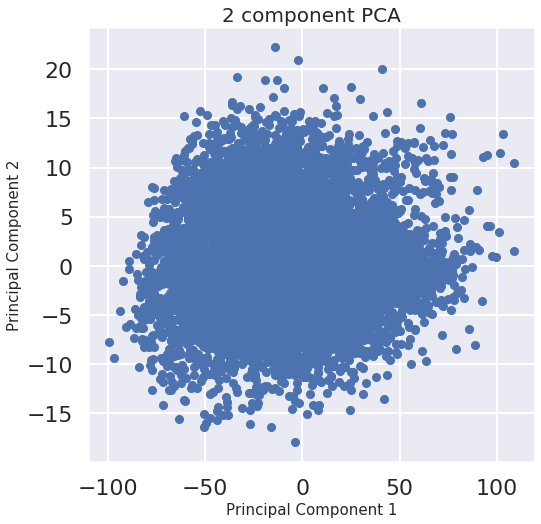

In [39]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


colormap = np.array(['r', 'b'])


ax.scatter(principalComponent[:,0]
               , principalComponent[:,1]
               , s = 50)

# for i,col in enumerate(principalComponent):
#   ax.annotate(col,(principalComponent.T[0,i], principalComponent.T[1,i]),fontsize=8)
plt.show()
ax.legend(targets)
ax.grid()

# Results with Phantasus 
[Check out the link to dataset](https://https://artyomovlab.wustl.edu/phantasus/?session=x0e0964e46dcc43)

# Complete Data PCA

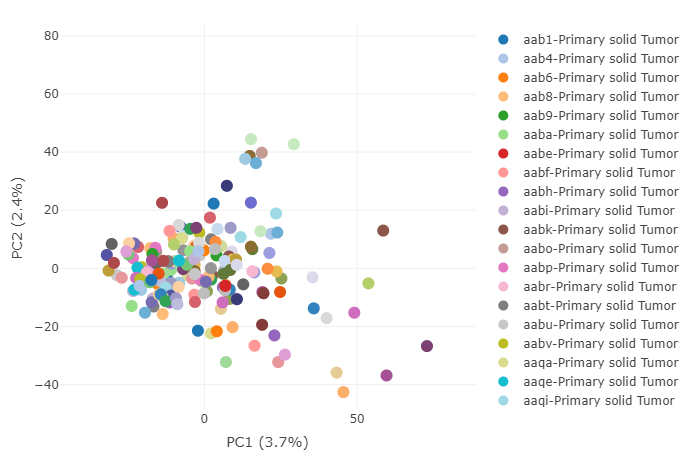

In [40]:
from IPython.display import Image
Image('/content/drive/My Drive/images/newplot.png')

# RNA Sequence Cluster

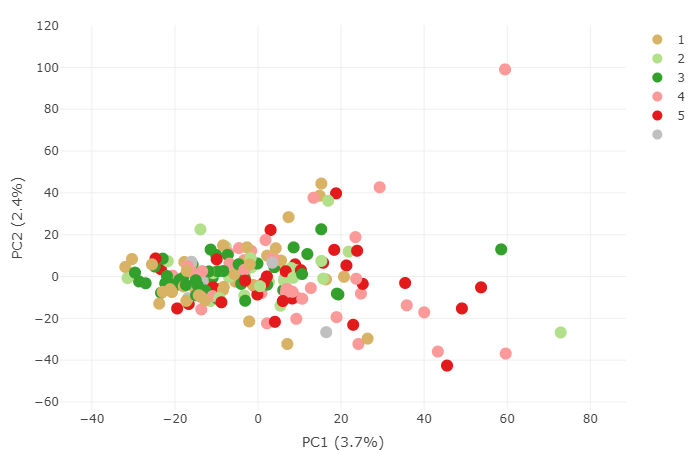

In [41]:
Image('/content/drive/My Drive/images/newplot (1).png')

# Sample Type

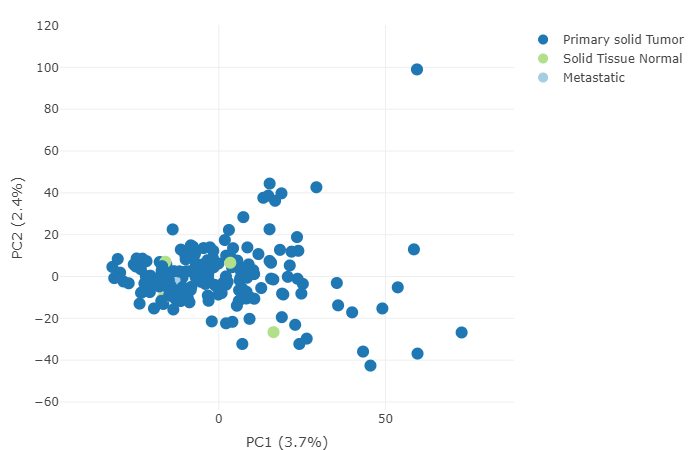

In [42]:
Image('/content/drive/My Drive/images/newplot (2).png')

# Adenocarcinoma Plot


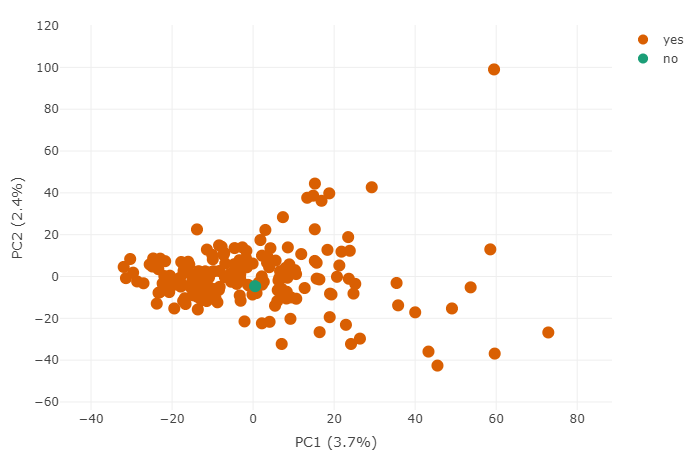

In [43]:
Image('/content/drive/My Drive/images/newplot (3).png')

# Histological Type Other (Overlaying adenocarcinoma)

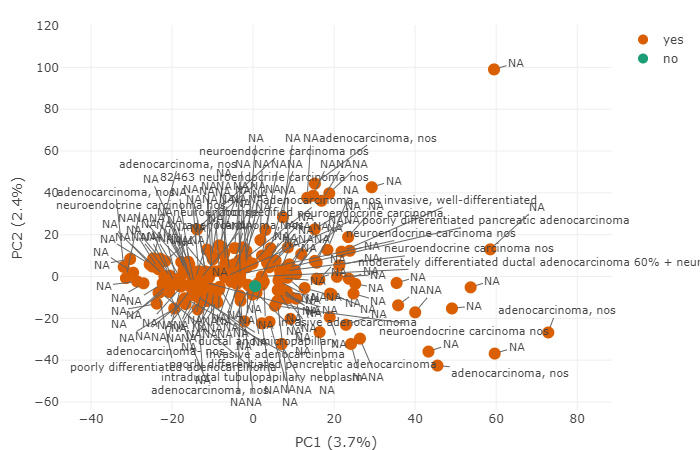

In [44]:
Image('/content/drive/My Drive/images/newplot (4).png')

# Remocing NeuroEndocrine samples from gctoo

In [0]:
# Removing neuroendocrine
neu=gctoo.col_metadata_df.histological_type_other.str.contains('Neuroendocrine')
adinocarcinoma=gctoo.col_metadata_df.drop(np.argwhere(neu==True))

In [46]:
# adinocarcinoma.head()
adinocarcinoma.dropna(axis=1)



chd,participant_id,sample_type,bcr_patient_barcode,bcr_patient_uuid,vital_status,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,bcr,bcr_aliquot_uuid,bcr_patient_canonical_status,day_of_dcc_upload,day_of_form_completion,days_to_birth,disease_code,file_uuid,gender,history_of_neoadjuvant_treatment,icd_10,icd_o_3_histology,icd_o_3_site,informed_consent_verified,mononucleotide_and_dinucleotide_marker_panel_analysis_status,month_of_dcc_upload,month_of_form_completion,neoplasm_histologic_grade,other_dx,pathologic_m,project_code,system_version,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,tissue_source_site,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,yes,65,head of pancreas,nationwide children's hospital,d3f960b2-c69d-4b64-a30f-72f4fa7bb2f9,canonical,21,5,-23962,paad,cda0d295-ea13-4065-9e5d-8177e827a8f6,male,no,c25.0,8480,c25.0,yes,mss,1,7,g3,no,m0,tcga,7,no,yes,2j,pancreas,primary,false,2016,2014
aab4-Primary solid Tumor,aab4,Primary solid Tumor,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,yes,48,other (please specify),nationwide children's hospital,9daae9d7-747e-44e0-a8f8-3c3f9e3f03f3,canonical,21,16,-17794,paad,d25a44b7-47b1-4a1b-ae08-7bd9aceab9c8,male,no,c25.8,8140,c25.8,yes,mss,1,7,g2,no,m0,tcga,7,no,yes,2j,pancreas,primary,false,2016,2014
aab6-Primary solid Tumor,aab6,Primary solid Tumor,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,yes,75,body of pancreas,nationwide children's hospital,c850368e-6e95-4879-8245-205ddeec6fbd,canonical,21,5,-27600,paad,6f72d859-d6af-4a35-8836-2e086684d90f,male,no,c25.1,8500,c25.1,yes,mss,1,7,g2,no,m0,tcga,7,no,yes,2j,pancreas,primary,false,2016,2014
aab8-Primary solid Tumor,aab8,Primary solid Tumor,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,yes,71,head of pancreas,nationwide children's hospital,5749429c-5ac9-40de-b44e-3b795520ec07,canonical,21,16,-26028,paad,ca534fd7-dad2-4bd8-9017-391bb314c4a8,male,no,c25.0,8500,c25.0,yes,mss,1,7,g3,no,m0,tcga,7,no,yes,2j,pancreas,primary,false,2016,2014
aab9-Primary solid Tumor,aab9,Primary solid Tumor,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,yes,70,head of pancreas,nationwide children's hospital,be56b07b-cd57-46a0-baa1-e20169d88468,canonical,21,5,-25920,paad,650295d6-db83-4fa3-909e-4640a77e6274,female,no,c25.0,8500,c25.0,yes,mss,1,8,g1,no,m0,tcga,7,no,yes,2j,pancreas,primary,false,2016,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a89d-Solid Tissue Normal,a89d,Solid Tissue Normal,tcga-yb-a89d,b84b58c7-95b8-4162-8e61-414f8fe422c6,alive,yes,59,head of pancreas,nationwide children's hospital,12ef6f0f-ca63-4139-a4f1-6ad86fc7db61,canonical - plus,21,11,-21792,paad,ecc8c706-333c-45dd-8f2f-69a0a41dd162,male,no,c25.1,8500,c25.1,yes,indeterminate,1,11,g2,no,mx,tcga,7,yes,no,yb,pancreas,primary,false,2016,2014
a89d-Primary solid Tumor,a89d,Primary solid Tumor,tcga-yb-a89d,b84b58c7-95b8-4162-8e61-414f8fe422c6,alive,yes,59,head of pancreas,nationwide children's hospital,12ef6f0f-ca63-4139-a4f1-6ad86fc7db61,canonical - plus,21,11,-21792,paad,ecc8c706-333c-45dd-8f2f-69a0a41dd162,male,no,c25.1,8500,c25.1,yes,indeterminate,1,11,g2,no,mx,tcga,7,yes,no,yb,pancreas,primary,false,2016,2014
a8sy-Primary solid Tumor,a8sy,Primary solid Tumor,tcga-yh-a8sy,503d7e36-df78-428d-9971-09ff707645c2,alive,yes,73,head of pancreas,nationwide children's hospital,50e76899-a6c1-4e0f-943c-025352a012ec,canonical,21,13,-26859,paad,f32b8793-b40c-4840-a3a7-8eff64b4fc9e,female,no,c25.0,8140,c25.0,yes,msi-l,1,5,g2,no,mx,tcga,7,no,yes,yh,pancreas,primary,false,2016,2014


# Working with GSVA

In [47]:
!pip install gsva


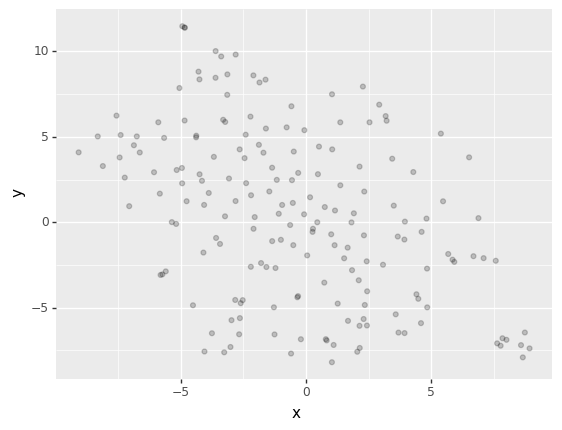

<ggplot: (8753663701729)>

In [48]:
import pandas as pd
from GSVA import gsva, gmt_to_dataframe
# Some extras to look at the high dimensional data
from plotnine import *
from sklearn.manifold import TSNE

XV = TSNE(n_components=2).\
    fit_transform(df.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)